## GWAS and eQTL Colocalizations Across MPRA Variants

In [36]:
library(tidyverse)
library(data.table)
library(fs)
library(bedr)
library(ggpubr)
library(ggrepel)
library(patchwork)
library(ggridges)
library(parallel)
library(pbapply)

setwd("~/work/mpra-v2")

In [66]:
mpraStats = fread("sumstats/1KG_novaSeq_DESeq2_Love_Base2.txt", header = T, stringsAsFactors = F)

mpraStats.tmp = mpraStats[,c(3,4,5,6,7,8,9,23,27,29,30,33)]
mpraStats.tmp = subset(mpraStats.tmp, haploFlag == "Base" & !is.na(geneID))
mpraStats.tmp = separate_rows(mpraStats.tmp, geneID,sep = ",")

In [67]:
subset(mpraStats.tmp, grepl("ENSG00000135541",geneID) & padj_allele < 5e-2 & padj_expr < 5e-2)

geneID,chrom,pos,strand,ref,alt,haploFlag,log2FoldChange_expr,padj_expr,log2FoldChange_allele,lfcSE_allele,padj_allele
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000135541,chr6,135793706,-,A,G,Base,0.973506,2.519226e-02,2.684406,0.7071864,4.934213e-03
ENSG00000135541,chr6,135844359,-,T,A,Base,-1.740151,2.897842e-12,3.563872,0.4675761,3.629846e-11
ENSG00000135541,chr6,135902599,-,A,T,Base,-2.129194,3.781403e-04,-3.243797,1.0381366,2.790816e-02


In [68]:
subset(mpraStats.tmp, grepl("ENSG00000172057",geneID) & padj_allele < 5e-2 & padj_expr < 5e-2)

geneID,chrom,pos,strand,ref,alt,haploFlag,log2FoldChange_expr,padj_expr,log2FoldChange_allele,lfcSE_allele,padj_allele
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000172057,chr17,38049233,-,T,C,Base,-0.4243022,0.003133102,0.9879061,0.2427917,0.002158882


In [69]:
subset(mpraStats.tmp, grepl("ENSG00000164308",geneID) & padj_allele < 5e-2 & padj_expr < 5e-2) 

geneID,chrom,pos,strand,ref,alt,haploFlag,log2FoldChange_expr,padj_expr,log2FoldChange_allele,lfcSE_allele,padj_allele
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000164308,chr5,96249115,+,C,T,Base,-0.6261257,6.723886e-04,1.1241613,0.3172781,0.0097949268
ENSG00000164308,chr5,96249852,+,T,TCTCA,Base,-1.2351825,5.022522e-03,-2.5906790,0.7388187,0.0108515751
ENSG00000164308,chr5,96252943,+,TG,T,Base,0.5092383,9.364171e-04,0.8529762,0.2642469,0.0218580836
ENSG00000164308,chr5,96268862,+,C,A,Base,0.5375789,3.870607e-04,-0.8124636,0.2625429,0.0297495080
ENSG00000164308,chr5,96271638,+,A,G,Base,1.3833832,1.022394e-03,-2.3080531,0.7224441,0.0236258195
ENSG00000164308,chr5,96288138,+,A,G,Base,-0.3129917,1.246517e-02,-0.8947643,0.2067822,0.0009392493
ENSG00000164308,chr5,96290647,+,C,T,Base,-0.3192094,1.129225e-02,0.6366549,0.2084007,0.0324990587
ENSG00000164308,chr5,96322136,+,A,G,Base,1.5584848,2.006702e-06,-1.6917903,0.5893307,0.0472619903
ENSG00000164308,chr5,96327739,+,AT,A,Base,2.2132090,1.251532e-04,3.4184087,1.0099172,0.0147774685


In [70]:
subset(mpraStats.tmp, grepl("ENSG00000100266",geneID) & padj_allele < 5e-2 & padj_expr < 5e-2) 

geneID,chrom,pos,strand,ref,alt,haploFlag,log2FoldChange_expr,padj_expr,log2FoldChange_allele,lfcSE_allele,padj_allele
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000100266,chr22,43195147,-,A,G,Base,-0.5906837,1.431346e-03,1.0992891,0.3164315,1.173994e-02
ENSG00000100266,chr22,43213631,-,C,CA,Base,2.7767494,4.016054e-06,4.8698454,1.0784844,4.839773e-04
ENSG00000100266,chr22,43216375,-,CTA,C,Base,0.4652891,3.222950e-02,-1.0993860,0.3509630,2.745457e-02
ENSG00000100266,chr22,43256166,-,A,G,Base,1.6639081,6.272726e-19,1.6145622,0.3580024,4.923914e-04
ENSG00000100266,chr22,43282457,-,GGTAT,G,Base,-1.8478940,4.258364e-03,3.7387050,1.0878942,1.298882e-02
ENSG00000100266,chr22,43311523,-,G,A,Base,-0.4818277,6.660095e-03,-0.9477392,0.2965983,2.362582e-02
ENSG00000100266,chr22,43317899,-,C,T,Base,-1.0184720,9.269247e-05,-1.5450268,0.4574961,1.505252e-02
ENSG00000100266,chr22,43327316,-,C,T,Base,-0.5236207,6.585501e-05,0.7360484,0.2310177,2.403343e-02
ENSG00000100266,chr22,43327579,-,G,C,Base,1.9132491,9.031025e-45,1.4326293,0.2665895,1.610659e-05


In [4]:
haploVarsExpr = fread("sumstats/haplotype/Expression.txt")
haploVars = fread("sumstats/haplotype/Allele3.txt")

haploVars$log2FoldChange_expr = haploVarsExpr$log2FoldChange
haploVars$padj_expr = haploVarsExpr$padj

haploVarsFormat = haploVars %>% 
                    filter(Pool == "1KGTest") %>%
                    select(chrom,pos.x,pos.y,geneID,strand,ref.x,alt.x,haploFlag.x,
                           log2FoldChange_expr,padj_expr,log2FoldChange,lfcSE,padj)

pos1 = haploVarsFormat[,-2]
pos2 = haploVarsFormat[,-3]

names(pos1) = c("chrom","pos","geneID","strand","ref","alt","haploFlag","log2FoldChange_expr","padj_expr","log2FoldChange_allele","lfcSE_allele","padj_allele")
names(pos2) = c("chrom","pos","geneID","strand","ref","alt","haploFlag","log2FoldChange_expr","padj_expr","log2FoldChange_allele","lfcSE_allele","padj_allele")

haploVarsFormat = rbind(pos1,pos2)
mpraStats.tmp = rbind(mpraStats.tmp,haploVarsFormat)

In [5]:
hgTable = fread("annotation/hgConversionTable.txt", stringsAsFactors = F, header = T)
mpraStats.tmp = merge(mpraStats.tmp, unique(hgTable),
                      by.x = c("chrom","pos"),
                      by.y = c("hg19_chrom","hg19_pos"))
eqtl.sub = fread("zcat annotation/Cells_EBV-transformed_lymphocytes.allpairs.subset.bed.gz")

In [5]:
files = dir_ls("/oak/stanford/groups/smontgom/shared/GTEx/barbeira_coloc/results_enloc_priors/Cells_EBV-transformed_lymphocytes/",glob="*txt.gz",recurse = T)
names(files) = str_split_fixed(names(files),pattern = "/",n=11)[,11]
files = paste0("zcat ",files)
data = suppressWarnings(files %>% map_dfr(fread, .id = "source"))
data$gene_id = gsub("\\..*","",data$gene_id, perl=T)

Taking input= as a system command ('zcat /oak/stanford/groups/smontgom/shared/GTEx/barbeira_coloc/results_enloc_priors/Cells_EBV-transformed_lymphocytes/ADIPOGen_Adiponectin__PM__Cells_EBV-transformed_lymphocytes.txt.gz') and a variable has been used in the expression passed to `input=`. Please use fread(cmd=...). There is a security concern if you are creating an app, and the app could have a malicious user, and the app is not running in a secure environment; e.g. the app is running as root. Please read item 5 in the NEWS file for v1.11.6 for more information and for the option to suppress this message.

Taking input= as a system command ('zcat /oak/stanford/groups/smontgom/shared/GTEx/barbeira_coloc/results_enloc_priors/Cells_EBV-transformed_lymphocytes/Astle_et_al_2016_Eosinophil_counts__PM__Cells_EBV-transformed_lymphocytes.txt.gz') and a variable has been used in the expression passed to `input=`. Please use fread(cmd=...). There is a security concern if you are creating an app, a

In [6]:
hitCounts = mpraStats.tmp %>% 
                filter(!is.na(geneID) & geneID != "") %>% 
                mutate(hit = ifelse(padj_allele < 5e-2 & padj_expr < 5e-2,"hit","nonhit")) %>%
                group_by(geneID, hit) %>% 
                summarize(count=n())

hitCounts = merge(hitCounts, data,
                  by.x="geneID",by.y = "gene_id")

posteriors = hitCounts %>% 
                group_by(geneID,source,p0,p1,p2,p3,p4) %>% 
                spread(hit,count,fill=0)

posteriors$file = apply(posteriors,1,function(x) files[as.integer(x[2])])
posteriors$file = gsub("zcat /oak/stanford/groups/smontgom/shared/GTEx/barbeira_coloc/results_enloc_priors/Cells_EBV-transformed_lymphocytes/","",posteriors$file)
posteriors$file = gsub("__PM__Cells_EBV-transformed_lymphocytes.txt.gz","",posteriors$file)

hitsOnly = subset(posteriors, (hit+nonhit>=10) & (hit > 0) & (p3 + p4 > 0.5))

`summarise()` regrouping output by 'geneID' (override with `.groups` argument)



In [18]:
write.table(hitsOnly, "sumstats/gtex-gwas-coloc-searchList.txt", quote = F, sep = "\t", col.names = T, row.names = F)

In [40]:
annotateSumStats = function(colocVector, mpraStats.tmp = mpraStats.tmp, eqtl.sub = eqtl.sub){

    library(bedr)
    
    gene = colocVector[1]
    trait = colocVector[10]
    
    gwas = paste0("~/work/mpra-v2/gwas/imputed_",trait,".subset.txt.gz")

    testVars = subset(mpraStats.tmp, geneID == gene)
    sigVars = subset(mpraStats.tmp, geneID == gene & padj_allele < 5e-2 & padj_expr < 5e-2)
    
    e1 = subset(eqtl.sub, V6 == gene)

    minPos = as.character(min(e1$V2))
    maxPos = as.character(max(e1$V3))
    chrom = unique(e1$V1)
    query = paste0(chrom,":",minPos,"-",maxPos)

    g1 = tryCatch( tabix(region = query,file.name = gwas,check.chr = T) ,
                  error = function(e) {return(data.frame("V2" = 1, "V9" = 1))} )
    g1$V9 = as.numeric(g1$V9)
    
    testedEQTL = subset(e1, V2 %in% testVars$hg38_pos)
    testedGWAS = subset(g1, V2 %in% testVars$hg38_pos)
    
    sigEQTL = subset(e1, V2 %in% sigVars$hg38_pos)
    sigGWAS = subset(g1, V2 %in% sigVars$hg38_pos)

    maxSigEQTL = ifelse(nrow(sigEQTL) > 0,max(-log10(sigEQTL$V8), na.rm = T),0)
    maxSigGWAS = ifelse(nrow(sigGWAS) > 0,max(-log10(sigGWAS$V9), na.rm = T),0)
    
    maxNonSigEQTL = ifelse(nrow(testedEQTL) > 0, max(-log10(testedEQTL$V8), na.rm = T),0)
    maxNonSigGWAS = ifelse(nrow(testedGWAS) > 0, max(-log10(testedGWAS$V9), na.rm = T),0)
    
    return(c(maxSigEQTL,maxSigGWAS,maxNonSigEQTL,maxNonSigGWAS))
}

In [33]:
# without a cluster

results = data.frame("maxSigEQTL" = NULL,"maxSigGWAS" = NULL,"maxNonSigEQTL" = NULL,"maxNonSigGWAS" = NULL)

for(i in 1:nrow(hitsOnly)){
        
    p = annotateSumStats(c(hitsOnly[i,]), mpraStats.tmp = mpraStats.tmp, eqtl.sub = eqtl.sub)
    
    results = rbind(results,p)
}

In [44]:
# with a cluster

cl = makeCluster(15)
maxSumStats = parApply(cl,hitsOnly,1,annotateSumStats,mpraStats.tmp = mpraStats.tmp, eqtl.sub = eqtl.sub)
stopCluster(cl)

maxSumStats = as.data.frame(t(maxSumStats))
names(maxSumStats) = c("maxSigEQTL","maxSigGWAS","maxNonSigEQTL","maxNonSigGWAS")

hitsOnlyWithSumStats = cbind(as.data.frame(hitsOnly), maxSumStats)
write.table(hitsOnlyWithSumStats, "sumstats/gtex-gwas-colocs.txt", col.names = T ,row.names = F, sep = "\t", quote = F)

In [38]:
hitsOnlyWithSumStats = fread("sumstats/gtex-gwas-colocs.txt")
ensg2gene = read.delim("annotation/ensg2gene.txt", header = F, stringsAsFactors = F) %>% 
                separate(V1,c("ensg","gene"),sep = "_",extra = "merge")

hitsOnlyWithSumStats = merge(hitsOnlyWithSumStats, ensg2gene, by.x = "geneID",by.y="ensg")
hitsOnlyWithSumStats[which(hitsOnlyWithSumStats$geneID == "ENSG00000164308"),"gene"] = "ERAP2" 
hitsOnlyWithSumStats[which(hitsOnlyWithSumStats$gene == "C8orf40"),"gene"] = "SMIM19"
hitsOnlyWithSumStats[which(hitsOnlyWithSumStats$gene == "C8orf70"),"gene"] = "ZC2HC1A"
hitsOnlyWithSumStats[which(hitsOnlyWithSumStats$gene == "C12orf48"),"gene"] = "PARBP"

In [39]:
hitsFilt = hitsOnlyWithSumStats %>% 
                filter(maxSigEQTL > -log10(5e-5) & maxSigGWAS > -log10(5e-8)) %>% 
                group_by(file,gene,hit) %>% 
                summarize(count=n())
dim(hitsOnlyWithSumStats)
unique(hitsFilt$file)

`summarise()` regrouping output by 'file', 'gene' (override with `.groups` argument)



[1] 4443   15

[1] "Astle_et_al_2016_Eosinophil_counts"                                 
 [2] "Astle_et_al_2016_Granulocyte_count"                                 
 [3] "Astle_et_al_2016_High_light_scatter_reticulocyte_count"             
 [4] "Astle_et_al_2016_Lymphocyte_counts"                                 
 [5] "Astle_et_al_2016_Monocyte_count"                                    
 [6] "Astle_et_al_2016_Myeloid_white_cell_count"                          
 [7] "Astle_et_al_2016_Neutrophil_count"                                  
 [8] "Astle_et_al_2016_Platelet_count"                                    
 [9] "Astle_et_al_2016_Red_blood_cell_count"                              
[10] "Astle_et_al_2016_Reticulocyte_count"                                
[11] "Astle_et_al_2016_Sum_basophil_neutrophil_counts"                    
[12] "Astle_et_al_2016_Sum_eosinophil_basophil_counts"                    
[13] "Astle_et_al_2016_Sum_neutrophil_eosinophil_counts"                  
[14] "Astle_et_al_2016_White_blood_cell_count"                            
[15] "CKDGen_Chronic_Kidney_Disease"                                      
[16] "EGG_BW3_EUR"                                                        
[17] "EGG_Pubertal_growth_12M"                                            
[18] "GABRIEL_Asthma"                                                     
[19] "GIANT_HEIGHT"                                                       
[20] "GIANT_HIP_Combined_EUR"                                             
[21] "GLGC_Mc_HDL"                                                        
[22] "IBD.EUR.Crohns_Disease"                                             
[23] "IBD.EUR.Inflammatory_Bowel_Disease"                                 
[24] "IBD.EUR.Ulcerative_Colitis"                                         
[25] "IMMUNOBASE_Multiple_sclerosis_hg19"                                 
[26] "IMMUNOBASE_Systemic_lupus_erythematosus_hg19"                       
[27] "RA_OKADA_TRANS_ETHNIC"                                              
[28] "TAGC_Asthma_EUR"                                                    
[29] "UKB_20002_1111_self_reported_asthma"                                
[30] "UKB_20002_1225_self_reported_hyperthyroidism_or_thyrotoxicosis"     
[31] "UKB_20002_1226_self_reported_hypothyroidism_or_myxoedema"           
[32] "UKB_20016_Fluid_intelligence_score"                                 
[33] "UKB_20022_Birth_weight"                                             
[34] "UKB_20127_Neuroticism_score"                                        
[35] "UKB_21001_Body_mass_index_BMI"                                      
[36] "UKB_23099_Body_fat_percentage"                                      
[37] "UKB_50_Standing_height"                                             
[38] "UKB_6152_8_diagnosed_by_doctor_Asthma"                              
[39] "UKB_6152_9_diagnosed_by_doctor_Hayfever_allergic_rhinitis_or_eczema"

In [56]:
table(hitsFilt$hit)
dim(hitsFilt)
(114-32)/114

table(unique(hitsFilt[,2:3])$hit)
length(unique(hitsFilt[,2:3])$hit)
(41-7)/41


 1  2  3  4  5  6  7  8  9 13 
32  9 17 21 12  3 11  3  2  4 

[1] 114   4

[1] 0.7192982


 1  2  3  4  5  6  7  8  9 13 
 7  6  8  4  5  2  5  1  1  2 

[1] 41

[1] 0.8292683

In [47]:
gwasLabels = data.frame("file" = unique(hitsFilt$file),
                       "trait" = c("Eosinophil Count",
                                   "Granuloctye Count",
                                   "HLS Reticulocyte Count",
                                   "Lymphocyte Count",
                                   "Monocyte Count",
                                   "Myeloid White Cell Count",
                                   "Neutrophil Count",
                                   "Platelet Count",
                                   "Red Blood Cell Count",
                                   "Reticulocyte Count",
                                   "Basophil+Neutrophil Count",
                                   "Basophil+Eosinophil Count",
                                   "Neutrophil+Eosinophil Count",
                                   "White Blood Cell Count",
                                   "Chronic Kidney Disease",
                                   "Birth Weight",
                                   "Pubertal Growth",
                                   "Asthma (GABRIEL)",
                                   "Height (GIANT)",
                                   "Waist (GIANT)",
                                   "HDL",
                                   "Crohns Disease",
                                   "Inflammatory Bowel Disease",
                                   "Ulcerative Colitis",
                                   "Multiple Sclerosis",
                                   "Systemic Lupus Erythematosus",
                                   "Rheumatoid Arthritis",
                                   "Asthma (TAGC)",
                                   "Asthma, Self-Reported (UKB)",
                                   "Hyperthyroidism/Thyrotoxicosis, Self-Reported (UKB)",
                                   "Hypothyroidism/Myxoedema, Self-Reported (UKB)",
                                   "Fluid Intelligence Score (UKB)",
                                   "Birth Weight (UKB)",
                                   "Neuroticism (UKB)",
                                   "Body Mass Index (UKB)",
                                   "Body Fat Percentage (UKB)",
                                   "Height (UKB)",
                                   "Asthma, Diagnosed (UKB)",
                                   "Allergic Rhinitis/Eczema, Diagnosed (UKB)"))

hitsFilt = merge(hitsFilt, gwasLabels, by="file")

In [48]:
write.table(hitsFilt,"sumstats/gtex-gwas-colocs-summary.txt", col.names = T, row.names= F, quote = F, sep = "\t")

In [2]:
hitsFilt = fread("sumstats/gtex-gwas-colocs-summary.txt")

hitsFilt$hit[which(hitsFilt$hit > 9)] = 9

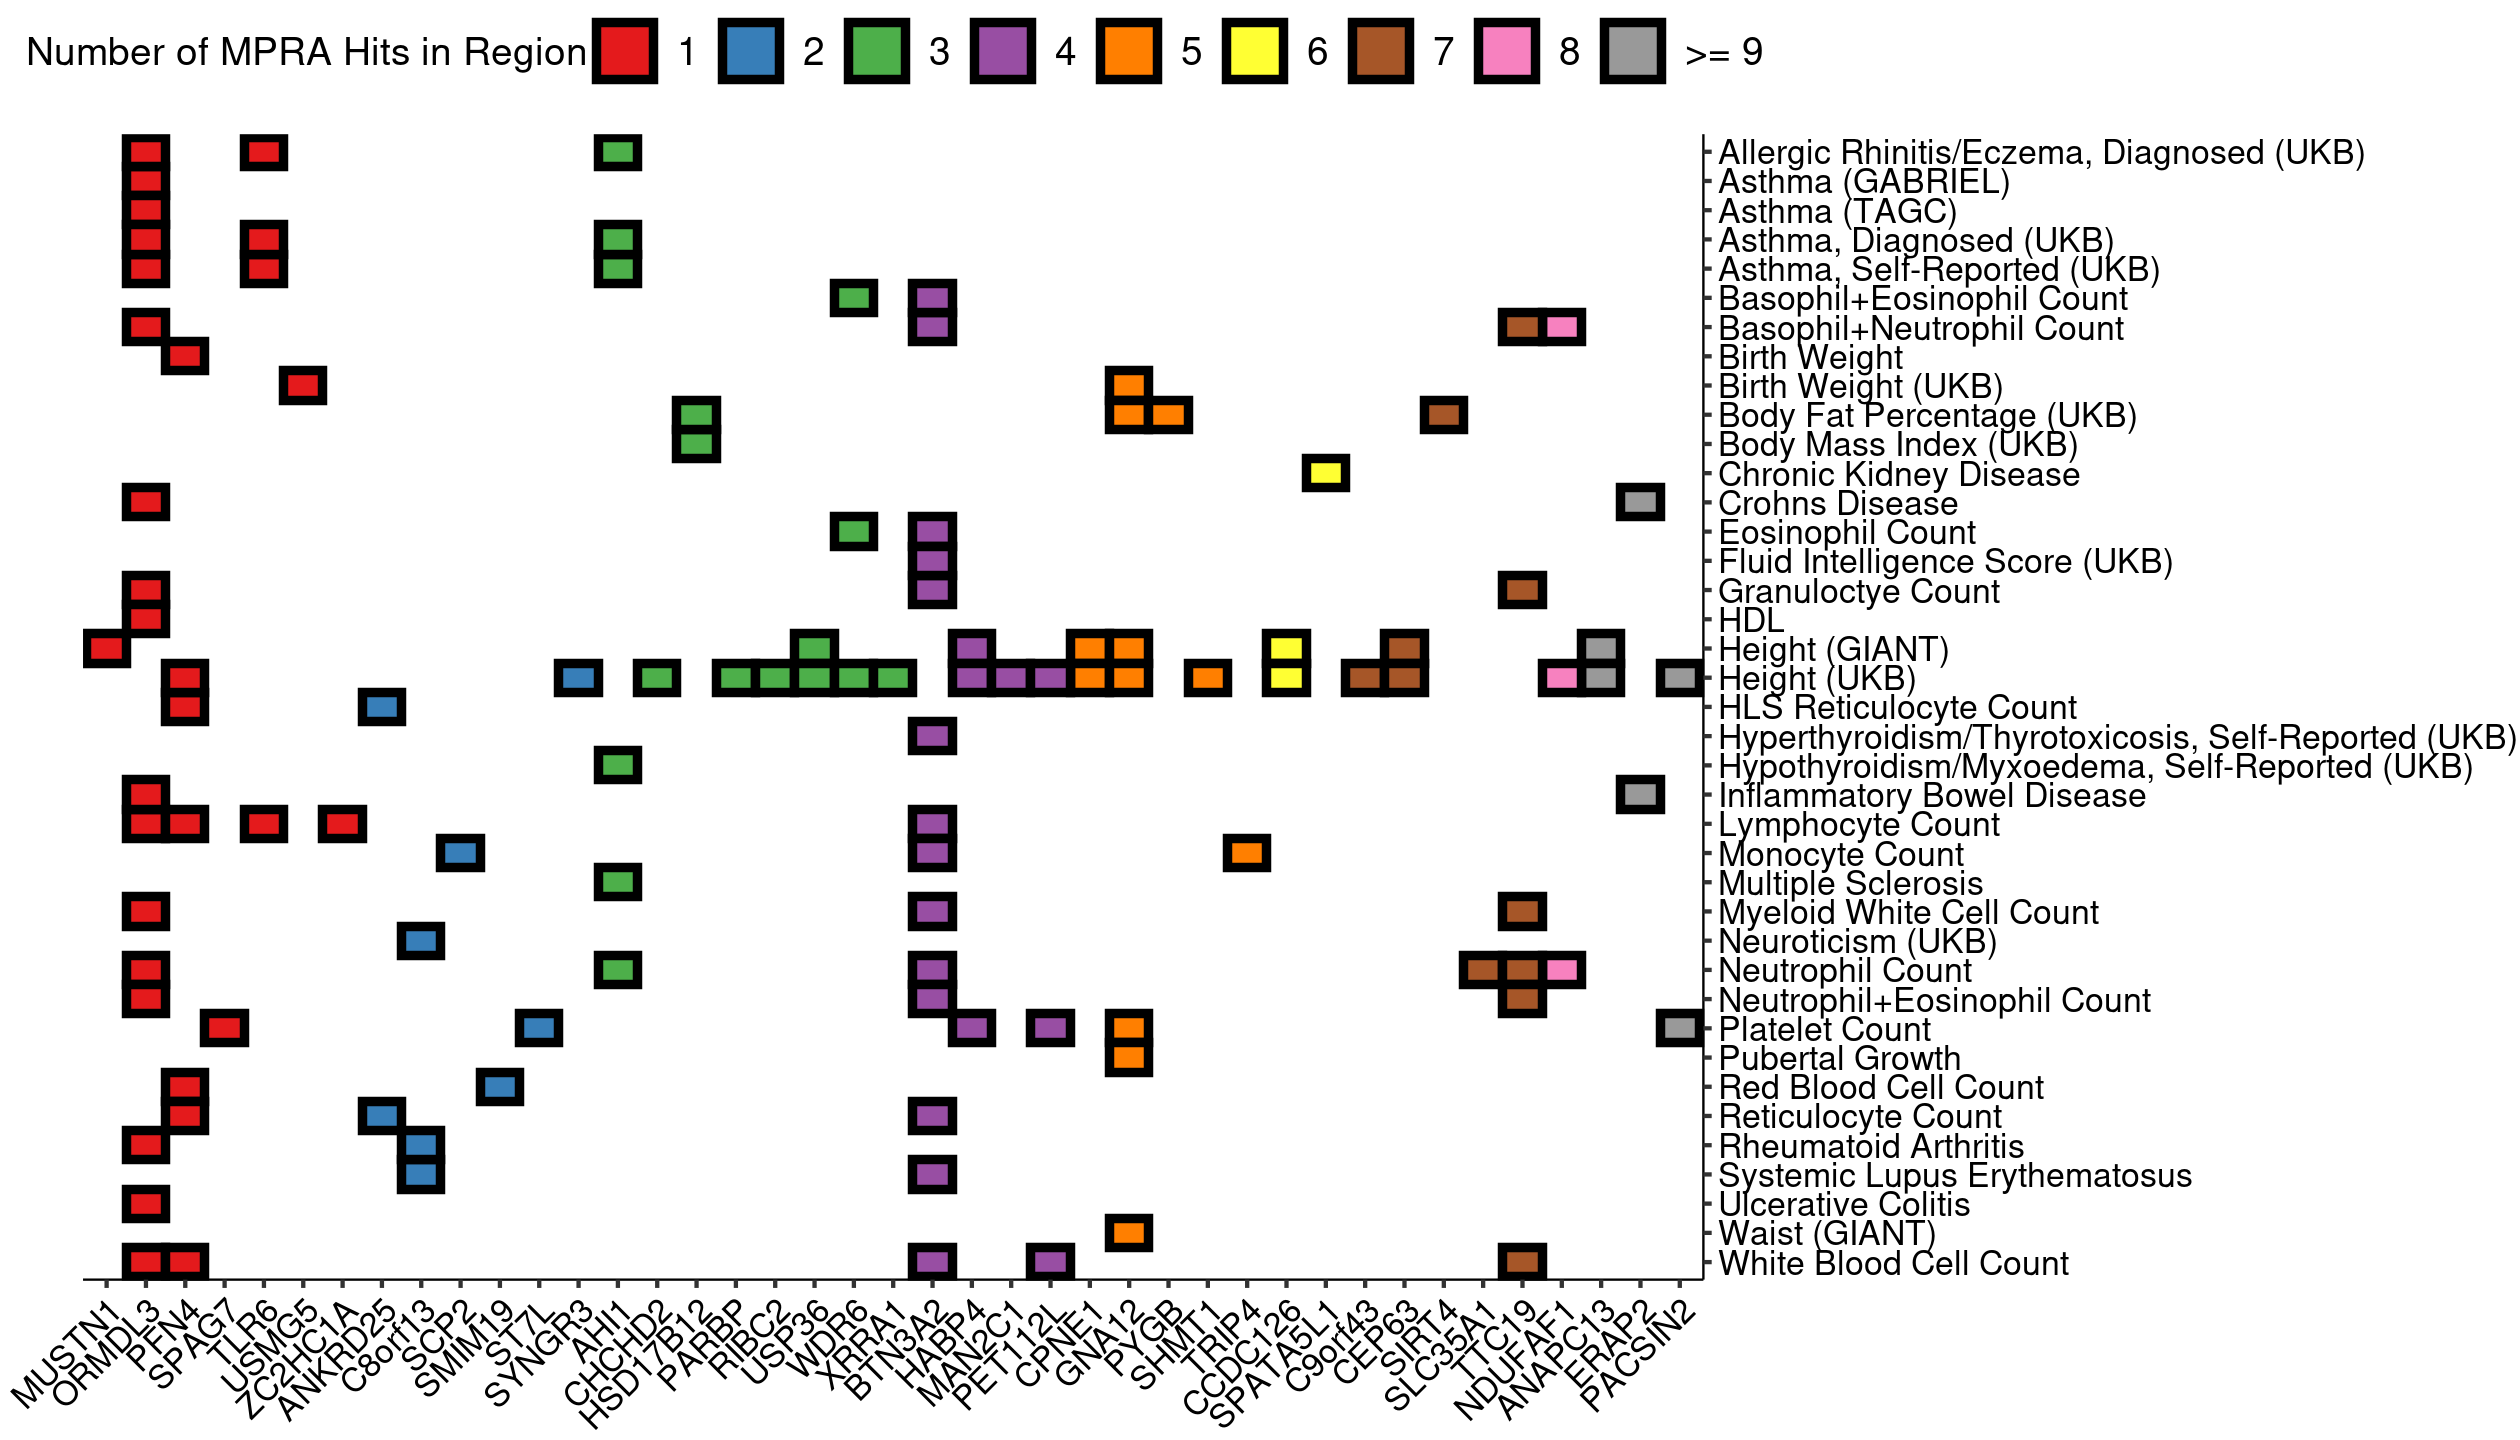

In [6]:
options(repr.plot.width=21,repr.plot.height=12)

gwasHeatmap = ggplot(hitsFilt) + 
    geom_tile(aes(y = factor(trait, levels = rev(levels(factor(trait)))),
                  x = reorder(gene,hit), 
                  fill = as.factor(hit)),color = "black",size=2) +
    theme_pubr(base_size = 20,x.text.angle = 45) +
    scale_fill_brewer(name="Number of MPRA Hits in Region", palette = "Set1", labels = c("1","2","3","4","5","6","7","8",">= 9")) + 
    theme(legend.position = "top",
          axis.title = element_blank(),
          legend.title=element_text(size=23),
          legend.text=element_text(size=23),
          legend.key.size = unit(1.4, "cm"),
          plot.margin = margin(t = 1, r = 1, b = 1, l = 50, unit = "pt")) + 
    scale_y_discrete(position = "right") +
    guides(fill=guide_legend(nrow=1,byrow=TRUE)) 

gwasHeatmap

In [78]:
colocsToPlot = hitsOnlyWithSumStats %>% 
                    filter(maxSigEQTL > -log10(5e-5) & maxSigGWAS > -log10(5e-8)) %>% 
                    group_by(file,geneID,gene,hit) %>% 
                    summarize(count=n())

`summarise()` regrouping output by 'file', 'geneID', 'gene' (override with `.groups` argument)



In [83]:
plotColoc = function(gene,gwas,geneName,gwasName){
    
    gwas = paste0("gwas/imputed_",gwas,".subset.txt.gz")
    testVars = subset(mpraStats.tmp, geneID == gene)
    sigVars = subset(mpraStats.tmp, geneID == gene & padj_allele < 5e-2 & padj_expr < 5e-2)

    e1 = subset(eqtl.sub, V6 == gene)

    minPos = as.character(min(e1$V2))
    maxPos = as.character(max(e1$V3))
    chrom = unique(e1$V1)
    query = paste0(chrom,":",minPos,"-",maxPos)

    g1 = tabix(region = query,file.name = gwas,check.chr = T)

    eqtlPlot = ggplot(e1) + 
                    geom_point(aes(x = as.numeric(V2), y = -log10(V8)),color = "black") + 
                    geom_point(data = subset(e1, V2 %in% testVars$hg38_pos), 
                               aes(x = as.numeric(V2), y = -log10(V8)), color = "dodgerblue", size = 3) + 
                    geom_point(data = subset(e1, V2 %in% sigVars$hg38_pos),
                               aes(x = as.numeric(V2), y = -log10(V8)),
                               color = "red", fill = "red", size = 5, shape = 23) + 
                    theme_pubr(base_size = 14) + #geom_vline(xintercept = 135418217) + geom_vline(xintercept = 135512325) +
                    ylab(paste0(geneName," -logP")) + xlab("hg38 position") #+ xlim(c(42300000,42700000))

    gwasPlot = ggplot(g1) + 
                    geom_point(aes(x = as.numeric(V2), y = -log10(as.numeric(V9))),color = "black") + 
                    geom_point(data = subset(g1, V2 %in% testVars$hg38_pos), 
                               aes(x = as.numeric(V2), y = -log10(as.numeric(V9))), color = "dodgerblue", size = 3) + 
                    geom_point(data = subset(g1, V2 %in% sigVars$hg38_pos),
                               aes(x = as.numeric(V2), y = -log10(as.numeric(V9))),
                               color = "red", fill = "red", size = 5, shape = 23) + 
                    theme_pubr(base_size = 14)  + #geom_vline(xintercept = 135418217) + geom_vline(xintercept = 135512325) +
                    ylab(paste0(gwasName," -logP")) + xlab("hg38 position") #+ geom_hline(yintercept = -log10(5e-8))

    m = merge(g1,e1,by=c("V1","V2"))

    comparePlot = ggplot(data = m, 
                         aes(x = -log10(as.numeric(V9.x)),y = -log10(as.numeric(V8.y)))) + 
                        geom_point() +
                        geom_point(data = subset(m, V2 %in% testVars$hg38_pos),
                                   aes(x = -log10(as.numeric(V9.x)), 
                                       y = -log10(as.numeric(V8.y))), 
                                   color = "dodgerblue", size = 3) +
                        geom_point(data = subset(m, V2 %in% sigVars$hg38_pos),
                                   aes(x = -log10(as.numeric(V9.x)), 
                                       y = -log10(as.numeric(V8.y))), 
                                   color = "red", fill = "red", size = 5, shape = 23) + 
                        theme_pubr(base_size = 14) +
                        xlab("GWAS -logP") + ylab("eQTL -logP")
    
    finalPlot = eqtlPlot|gwasPlot|comparePlot
    return(finalPlot)
}

pdf("MPRA-GTEx-coloc-all.pdf",width = 15, height = 5, useDingbats = F)
for(i in 1:nrow(colocsToPlot)){
    
    theRow = colocsToPlot[i,]
    print(theRow[2])
    thePlot = plotColoc(as.character(theRow[2]),theRow[1],theRow[3],theRow[1])
    print(thePlot)
}
dev.off()

# A tibble: 1 x 1
# Groups:   geneID [1]
  geneID         
  <chr>          
1 ENSG00000178252
TABIX-QUERY
 * Processing input (1): 
CONVERT TO BED
 * Checking input type... PASS
   Input is in index format
VALIDATE REGIONS
 * Check if index is a string... PASS
 * Check index pattern... PASS
 * Check for missing values... PASS
 * Check for larger start position... PASS.
 * Check if zero based... PASS
 * Checking sort order... PASS
 * Checking for overlapping 'contiguous' regions... FAIL
   The input for object has overlapping features!
   This can cause unexpected results for some set operations.
   i.e. x <- bedr.merge.region(x)

bash -c 'tabix  gwas/imputed_Astle_et_al_2016_Eosinophil_counts.subset.txt.gz -R /tmp/RtmpPLd0j0/_c86b747fb4f5.bed '
# A tibble: 1 x 1
# Groups:   geneID [1]
  geneID         
  <chr>          
1 ENSG00000186470
TABIX-QUERY
 * Processing input (1): 
CONVERT TO BED
 * Checking input type... PASS
   Input is in index format
VALIDATE REGIONS
 * Check if index is

png 
  2

In [84]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/libopenblas-r0.3.3.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] pbapply_1.4-3     ggridges_0.5.2    patchwork_1.1.0   ggrepel_0.8.2    
 [5] ggpubr_0.4.0      bedr_1.0.7        fs_1.5.0          data.table_1.13.2
 [9] forcats_0.5.0     stringr_1.4.0     dplyr_1.0.2       purrr_0.3.4      
[13] readr_1.4.0       tidyr_1.1.2       tibble_3.0.4      ggplot2_3.3.2    
[17] tidyvers